In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

# Derived fields using confirmed column names
df['review_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['year'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce').dt.year

# Set visualization style
sns.set(style="whitegrid")


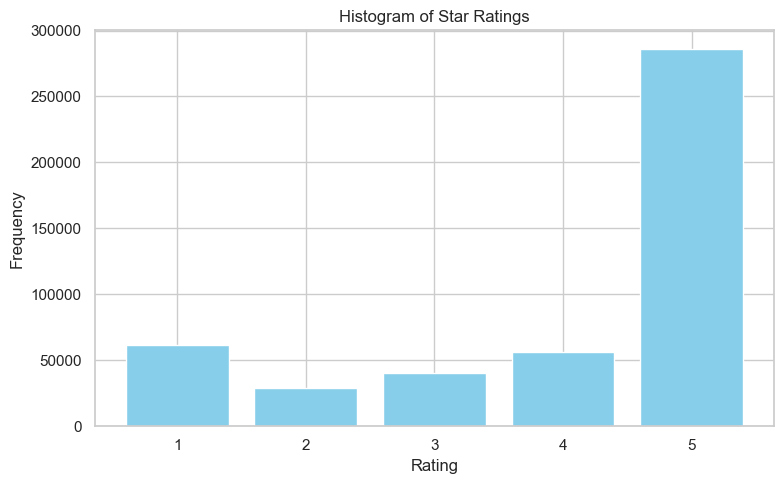

In [8]:
# Star Rating Histogram
plt.figure(figsize=(8, 5))
df['rating'].plot(kind='hist', bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], rwidth=0.8, color='skyblue')
plt.title("Histogram of Star Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

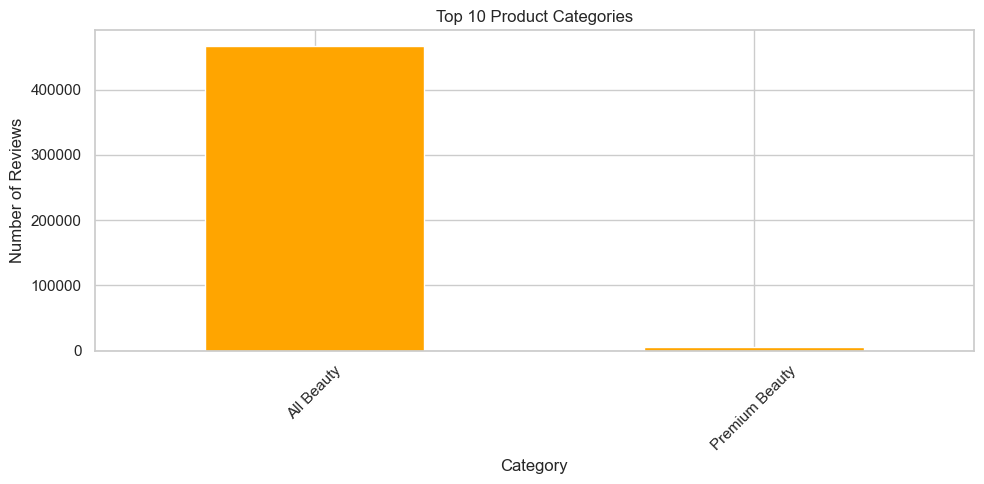

In [16]:
# Review Count
top_categories = df['main_category'].value_counts().head(10) 
plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar', color='orange')
plt.title("Top 10 Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

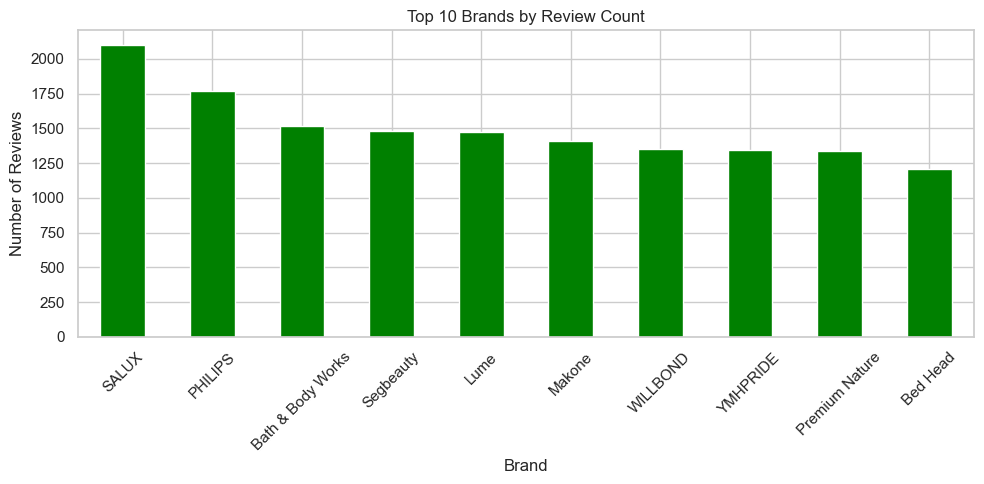

In [11]:
# Top 10 Brands by Review Count (i'm excluding 'Unknown')
top_brands = df[df['brand'] != "Unknown"]['brand'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_brands.plot(kind='bar', color='green')
plt.title("Top 10 Brands by Review Count")
plt.xlabel("Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

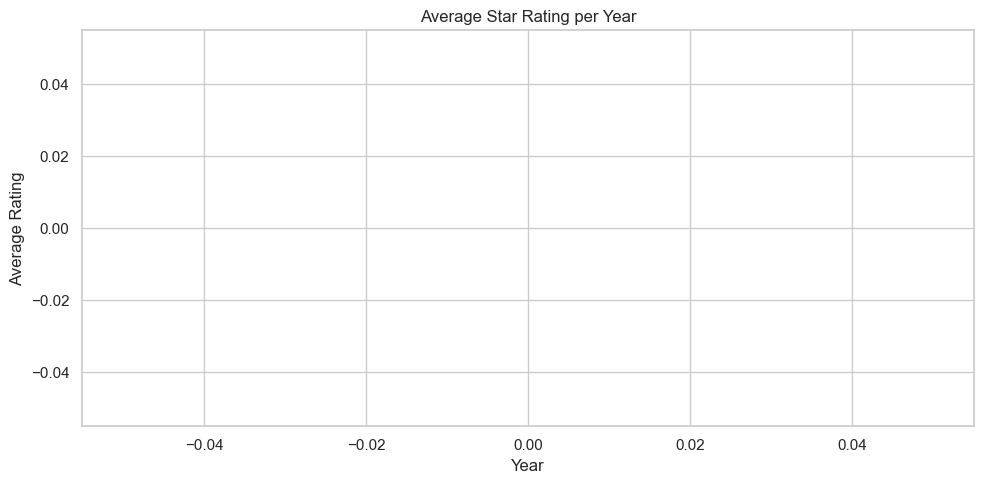

In [12]:
# Average Rating per Year (Line Chart)
yearly_avg = df.groupby('year')['rating'].mean()
plt.figure(figsize=(10, 5))
yearly_avg.plot(marker='o', color='purple')
plt.title("Average Star Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Pearson Correlation: Review Length vs Rating
corr_value, p_value = pearsonr(df['review_length'], df['rating'])
print(f" Pearson Correlation (review length vs rating): {corr_value:.4f} (p = {p_value:.4e})")

 Pearson Correlation (review length vs rating): -0.0217 (p = 1.7077e-50)


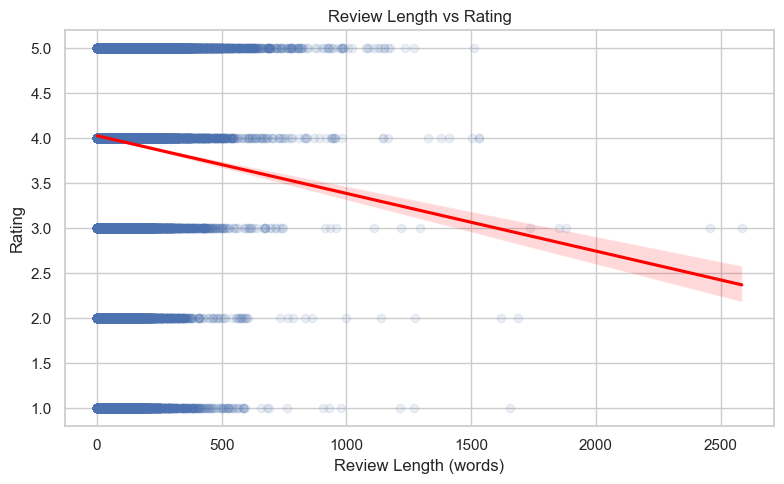

In [14]:
# Optional: Scatter plot to visualize relationship
plt.figure(figsize=(8, 5))
sns.regplot(x='review_length', y='rating', data=df, scatter_kws={'alpha':0.1}, line_kws={"color":"red"})
plt.title("Review Length vs Rating")
plt.xlabel("Review Length (words)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()